In [13]:
import scipy.misc
import numpy as np
from PIL  import Image

In [199]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale



In [115]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [21]:
np.random.seed(42)

In [2]:
# 71 characters
nb_classes = 71
# input image dimensions
img_rows, img_cols = 32, 32

ary = np.load("hiragana.npz")['arr_0'].reshape([-1, 127, 128]).astype(np.float32) / 15
X_train = np.zeros([nb_classes * 160, img_rows, img_cols], dtype=np.float32)
for i in range(nb_classes * 160):
    X_train[i] = scipy.misc.imresize(ary[i], (img_rows, img_cols), mode='F')

/home/hexagramg/exp/venv/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  if __name__ == '__main__':


In [9]:
len(ary)


11360

In [2]:
ary = np.load("hiragana.npz") 

In [5]:
ary['arr_0'].shape

(71, 160, 127, 128)

In [15]:
data = ary['arr_0']

In [18]:
data[0,0,:]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

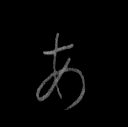

In [16]:
Image.fromarray(data[0,0,:])


In [19]:
firstLetter = data[0,:]

In [22]:
firstLetter.shape

(160, 127, 128)

In [23]:
digits = load_digits()
data = scale(digits.data)

In [32]:
digits.data.shape

(1797, 64)

In [33]:
sample = np.array(digits.data)

In [37]:
ss = sample.reshape(1797,8,8).astype(np.uint8)


In [39]:
ss[0,:]

array([[ 0,  0,  5, 13,  9,  1,  0,  0],
       [ 0,  0, 13, 15, 10, 15,  5,  0],
       [ 0,  3, 15,  2,  0, 11,  8,  0],
       [ 0,  4, 12,  0,  0,  8,  8,  0],
       [ 0,  5,  8,  0,  0,  9,  8,  0],
       [ 0,  4, 11,  0,  1, 12,  7,  0],
       [ 0,  2, 14,  5, 10, 12,  0,  0],
       [ 0,  0,  6, 13, 10,  0,  0,  0]], dtype=uint8)

In [41]:
firstLetter_ = firstLetter.reshape(160,16256)

In [254]:
n_samples, n_features = firstLetter_.shape
n_digits = 10

In [169]:
est = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)

est_ = KMeans(init='random', n_clusters=n_digits, n_init=10)


In [183]:
esst = est.fit(firstLetter_)

In [184]:
esst.inertia_

AttributeError: 'DBSCAN' object has no attribute 'inertia_'

In [239]:
pred = esst.predict(firstLetter_)

AttributeError: 'numpy.ndarray' object has no attribute 'predict'

In [279]:
pred

array([8, 3, 7, 4, 7, 4, 6, 4, 8, 6, 5, 2, 3, 2, 9, 1, 4, 3, 2, 4, 1, 5,
       9, 4, 0, 9, 8, 1, 6, 1, 8, 4, 5, 1, 4, 1, 0, 0, 1, 4, 7, 5, 8, 7,
       0, 0, 9, 5, 0, 9, 3, 6, 7, 4, 1, 3, 1, 4, 6, 0, 8, 4, 5, 0, 4, 8,
       6, 3, 8, 5, 8, 6, 2, 0, 5, 2, 7, 1, 5, 7, 5, 8, 2, 0, 9, 1, 4, 0,
       6, 1, 4, 1, 3, 1, 0, 1, 1, 3, 6, 2, 8, 9, 4, 8, 4, 7, 0, 8, 9, 4,
       9, 1, 1, 1, 1, 0, 1, 4, 3, 2, 1, 1, 1, 0, 8, 1, 1, 1, 5, 1, 1, 0,
       1, 2, 0, 7, 3, 4, 6, 3, 0, 9, 5, 5, 1, 1, 4, 6, 2, 7, 6, 2, 5, 4,
       5, 3, 1, 7, 0, 1], dtype=int32)

In [285]:
inic = [i for i,v in enumerate(pred) if v ==0]

In [286]:
len(inic)

19

In [287]:
new_img = Image.new('L', (128*7, 128*7))

In [288]:
for i,v in enumerate(inic):
    iimg = Image.fromarray(firstLetter[v,:])
    new_img.paste(iimg, (128*(i%7), 128*(i//7)))


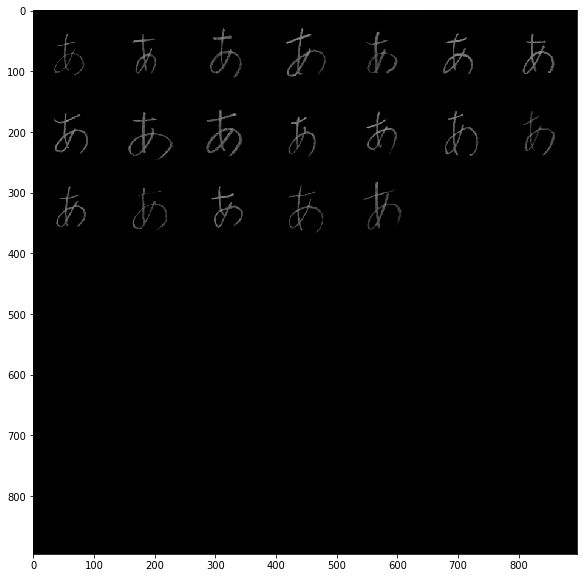

In [289]:
plt.imshow(new_img)

In [275]:
# in this case the seeding of the centers is deterministic, hence we run the
# kmeans algorithm only once with n_init=1
pca = PCA(n_components=n_digits).fit_transform(firstLetter_)
pcak = KMeans(init='k-means++', n_clusters=n_digits, n_init=5)

print(82 * '_')



__________________________________________________________________________________


In [276]:
pcak.fit(pca)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=10, n_init=5, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [277]:
pred = pcak.predict(pca)

In [260]:
# #############################################################################
# Visualize the results on PCA-reduced data

reduced_data = PCA(n_components=6).fit_transform(firstLetter_)
kmeans = KMeans(init='k-means++', n_clusters=n_digits, n_init=10)
kmeans.fit(reduced_data)

# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .01     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

MemoryError: 